# EDA

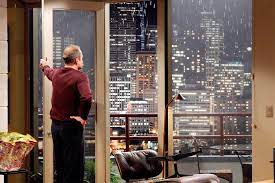

In [840]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [841]:
# reading data from CSV into data frame
df = pd.read_csv('eda_house_join_sales_on_left.csv')
df = df.reset_index()

In [842]:
# Getting some insight into the data
df.head()

,index,date,price,house_id,id_sales,id_houses,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [843]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   house_id       21597 non-null  int64  
 4   id_sales       21597 non-null  int64  
 5   id_houses      21597 non-null  int64  
 6   bedrooms       21597 non-null  float64
 7   bathrooms      21597 non-null  float64
 8   sqft_living    21597 non-null  float64
 9   sqft_lot       21597 non-null  float64
 10  floors         21597 non-null  float64
 11  waterfront     19206 non-null  float64
 12  view           21534 non-null  float64
 13  condition      21597 non-null  int64  
 14  grade          21597 non-null  int64  
 15  sqft_above     21597 non-null  float64
 16  sqft_basement  21145 non-null  float64
 17  yr_built       21597 non-null  int64  
 18  yr_ren

In [844]:
# Data Cleaning - Checking for duplicates
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [845]:
# Data Cleaning - Changing date from object to datetime with format %Y/%m/%d
df['date'] = pd.to_datetime(df['date'], format='ISO8601')
df.date.dtype

dtype('<M8[ns]')

In [846]:
# Data Cleaning - Dealing with outliers values
df.zipcode.unique()
df.waterfront.unique()
df.view.unique()
df.sqft_basement.unique()

# Rounding up float values
df['lat'] = df.lat.round(2)
df['long'] = df.long.round(2)
df['price'] = df.price.round(2)

In [847]:
# There is something wrong with the renovated years -- need to be divided by ten, I assume
df['yr_renovated'] = df.yr_renovated.apply(lambda x: (x)/10)

df['yr_renovated']

0          0.000
1       1991.000
2            NaN
3          0.000
4          0.000
          ...   
21592      0.000
21593      0.000
21594      0.000
21595      0.000
21596      0.000
Name: yr_renovated, Length: 21597, dtype: float64

Now I am finished with data cleaning and will start looking into correlations of the data

540296.5735055795

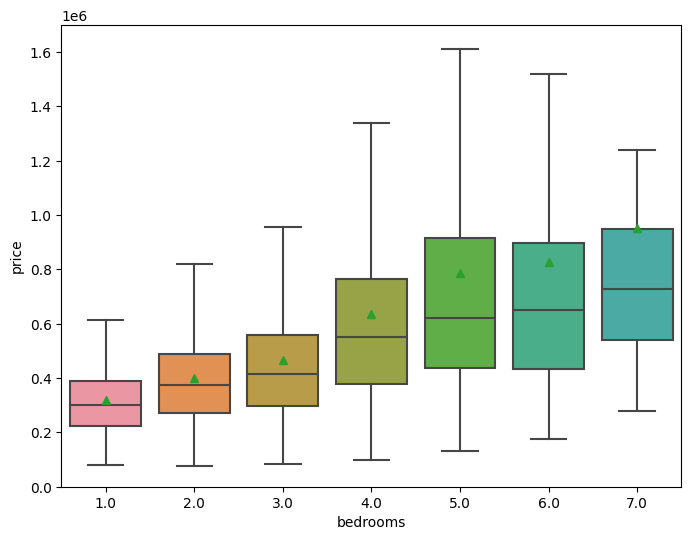

In [848]:
# Find correlation between price and nr of bedrooms
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df,x='bedrooms',y='price',ax=ax,showmeans=True,showfliers=False) # removing outliers
ax.set_xlim(-0.5,6.5)
ax.set_ylim(0,1.7e6) 


avr_price = df.price.mean()
avr_price

<Axes: xlabel='condition', ylabel='price'>

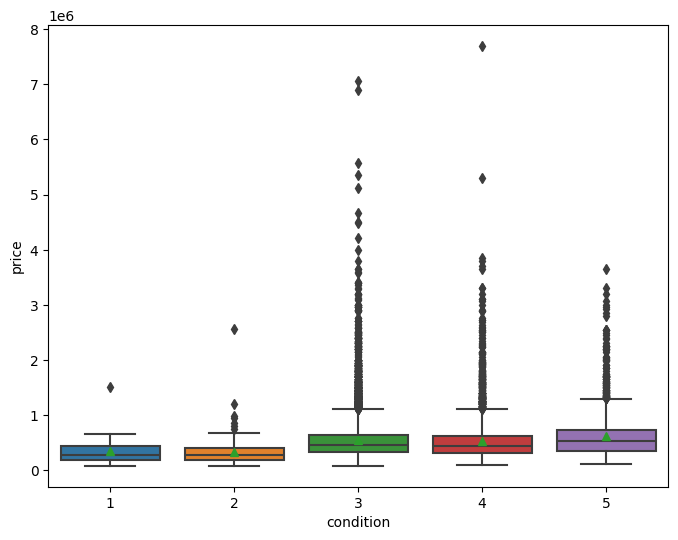

In [874]:
# Find correlation between price and nr of bathrooms
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df,x='condition',y='price',ax=ax,showmeans=True,showfliers=True) # removing outliers
# ax.set_xlim(-0.5,6.5)
# ax.set_ylim(0,1.8e6) 


(0.0, 8000.0)

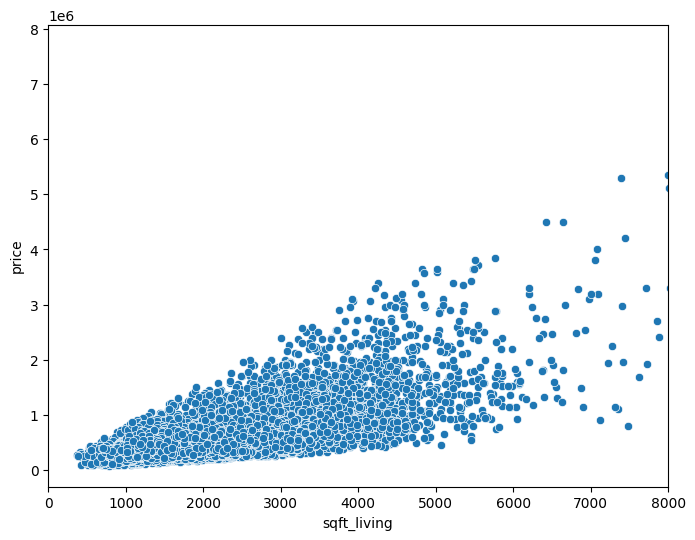

In [849]:
# Correlation between price and square foot of living area
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df,x='sqft_living',y='price',ax=ax) # removing outliers
ax.set_xlim(0,8000)



(0.0, 4000000.0)

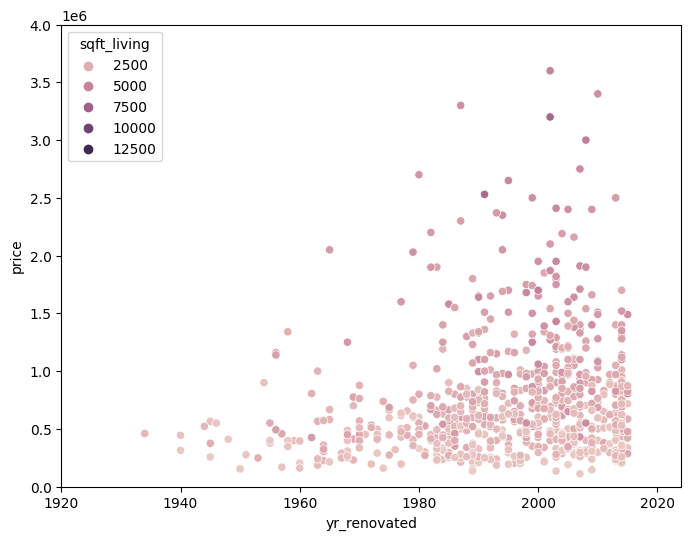

In [863]:
# Correlation between price and year of renovation 
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df,x='yr_renovated',y='price',ax=ax,hue='sqft_living') # removing outliers
ax.set_xlim(1920,2024)
ax.set_ylim(0,4e6)


In [856]:

print(f"numbers of rows in which year of renovation is 0 or NaN: {df.yr_renovated.isna().count() + df.yr_renovated.isnull().count() }")

# dropping columns with non valid revonation year:
yr_ren_df = df[ (df.yr_renovated.isna()) & (df.yr_renovated.isnull())]
# yr_ren_df.yr_renovated.dropna()

# yr_ren_df[yr_ren_df['yr_renovated']==0]


yr_ren_df.yr_renovated.isnull()




numbers of rows in which year of renovation is 0 or NaN: 43194


2        True
12       True
23       True
26       True
28       True
         ... 
21576    True
21577    True
21579    True
21581    True
21583    True
Name: yr_renovated, Length: 3848, dtype: bool

(1800.0, 2024.0)

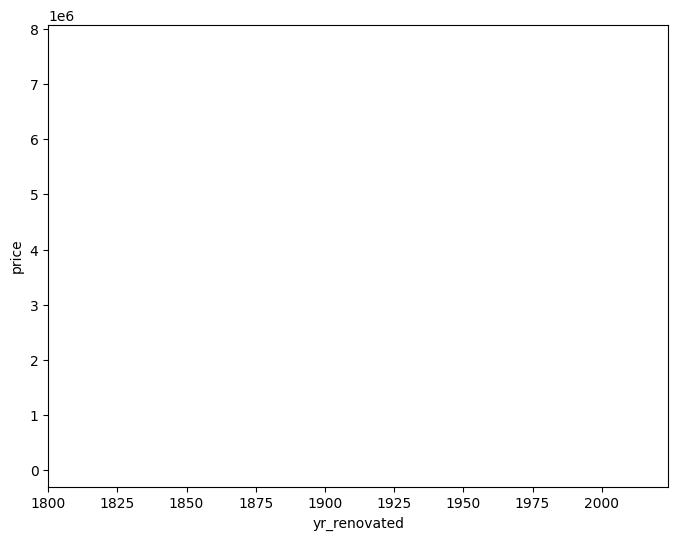

In [758]:
# Correlation between price and renovation year
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df,x='yr_renovated',y='price',ax=ax) # removing outliers
ax.set_xlim(1800,2024)
# ax.set_ylim(0,1.7e6) 

Defining search criterias:

#1: Wants house built before 1950 and not renovated since 1980 - my client is handy and willing to renovate himself, he wants at least 3 bedrooms and 2 bathrooms, he wants no waterfront, as his kids don't know how to swim. He wants at least 100m² of living area
#2: my client sets the limit price as average price for houses within first criteria

In [887]:
df.sqft_living

0       1180.000
1       2570.000
2        770.000
3       1960.000
4       1680.000
          ...   
21592   1530.000
21593   2310.000
21594   1020.000
21595   1600.000
21596   1020.000
Name: sqft_living, Length: 21597, dtype: float64

In [ ]:
# scatter of prices fitting criteria #1

# new data frame filtered by criteria 1:
df_c1 = df[ (df['bedrooms']>3) & (df['bathrooms']>2) & (df['yr_renovated']<1980) & (df['yr_built']<1950) & (df['waterfront']!=1) & (df['sqft_living']>100)]

avr_price =df_c1.price.mean()
avr_price
# new data frame filtered by criteria 2
df_c2 = df_c1[df_c1['price']<avr_price]


35

In [ ]:
df.pivot_table(index='lat',columns='long',values='price',dropna=True).notnull().sum().head(50)

Text(70.72222222222221, 0.5, 'Longitude')

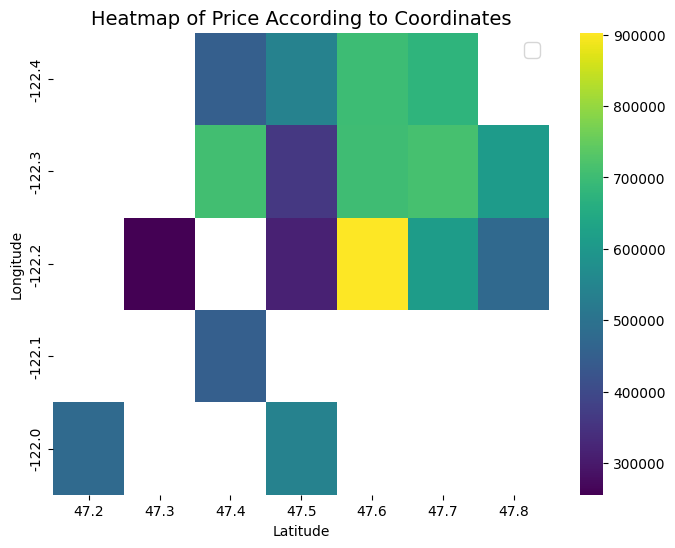

In [890]:
# Find correlation between price and coordinates - To filter out locations that don't fit client's criterias
df_hm = df_c2[['lat', 'long', 'price']].copy()

df_hm['lat']=df_hm.lat.round(1)
df_hm['long']=df_hm.long.round(1)
# # df_m = df2.groupby(["lat", "long"]).mean().unstack(level=0)
df_p = df_hm.pivot_table(index='long',columns='lat',values='price',dropna=True,)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_p, cmap='viridis',ax=ax)
ax.set_title("Heatmap of Price According to Coordinates", fontsize=14)
ax.legend(fontsize=14)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

From the heatmap above I know that the areas I am interested in are:

1: lat <47.5

2: lat >47.7 and long < 122.2

<Axes: xlabel='price', ylabel='Count'>

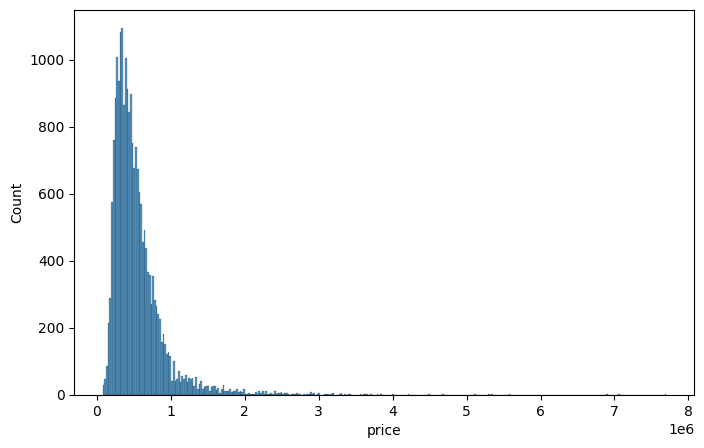

In [657]:
sns.histplot(data=df,x='price')

In [ ]:
# Find correlation between price and zipcode
df_z1 = df[ (df['lat']<47.3) & (df['long']<122)].zipcode.reset_index().rename({'zipcode':'zipcode_1'},axis=1)
df_z12 = df[ (df['lat']>47.3) & (df['lat']<47.6) & (df['long']<122)].zipcode.reset_index().rename({'zipcode':'zipcode_12'},axis=1)
df_z2 = df[ (df['lat']>47.6) & (df['long']<122)].zipcode.reset_index().rename({'zipcode':'zipcode_2'},axis=1)
df_z3 = df[ (df['lat']<=47.5) & (df['long']>=122)].zipcode.reset_index().rename({'zipcode':'zipcode_3'},axis=1)
df_z4 = df[ (df['lat']>=47.5) & (df['long']>=122)].zipcode.reset_index().rename({'zipcode':'zipcode_4'},axis=1)

df_conc = pd.concat([df_z1,df_z2,df_z3,df_z4])
# sns.heatmap(df_conc, cmap='viridis')


a1 = df_z1.zipcode_1.unique()
a12 = df_z12.zipcode_12.unique()
a2 = df_z2.zipcode_2.unique()
a3 = df_z3.zipcode_3.unique()
a4 = df_z4.zipcode_4.unique()

# df_z1[df_z1['zipcode_1'].isin(a4)].count().sum()

df_conc

In [686]:
# Find zipcodes correlating to prices beloy my limit, limit defined by < average
target_zipcodes = df[(df['price']<avr_price) & (df['bedrooms']>3) & (df['yr_renovated']<1950)].zipcode.unique()
# df[df['price']<avr_price].zipcode.nunique()

df[(df['price']<avr_price) & (df['bedrooms']>3) & (df['yr_renovated']<1900)].zipcode.nunique()

68

In [ ]:
step = 0.05
boundingBox = {"lat":
               {"min": np.floor(df.lat.min()/step)*step,
                "max": np.ceil(df.lat.max()/step)*step},
               "lon":
               {"min": np.floor(df.long.min()/step)*step,
                "max": np.ceil(df.long.max()/step)*step}
               }
noOfLatEdges = int(
    (boundingBox["lat"]["max"] - boundingBox["lat"]["min"]) / step)
noOfLonEdges = int(
    (boundingBox["lon"]["max"] - boundingBox["lon"]["min"]) / step)
latBins = np.linspace(boundingBox["lat"]["min"],
                      boundingBox["lat"]["max"], noOfLatEdges)
lonBins = np.linspace(boundingBox["lon"]["min"],
                      boundingBox["lon"]["max"], noOfLatEdges)

sns.histplot(data=df,x='lat',y='long',bins=[latBins, lonBins])

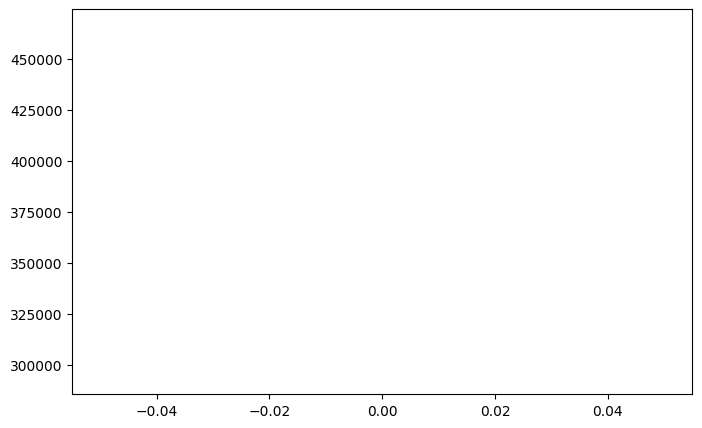

In [654]:
fig, ax = plt.subplots()

ax.plot(df[ (df['lat']<47.3) & (df['long']<122)].price.mean())

ax.plot(df[ (df['lat']>47.3) & (df['lat']<47.6) & (df['long']<122)].price.mean())

plt.show()



(0.5, 1000000.0)

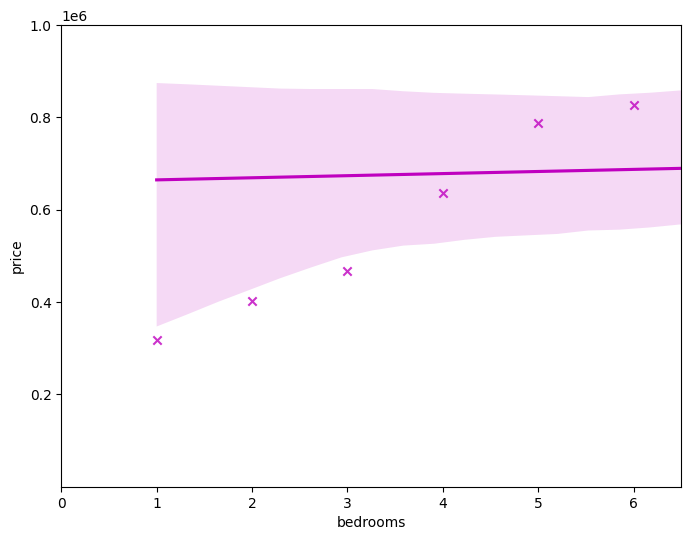

In [541]:
# plotting mean values of price according to nr of bedrooms
grp_bed = df.groupby('bedrooms').mean().reset_index()
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(data=grp_bed,x='bedrooms',y='price',ax=ax,marker='x',color="m")
ax.set_xlim(0,6.5)
ax.set_ylim(0.5,1e6) 

In [ ]:
# Find correlation between price and year of renovation

In [ ]:
# Find measure of how social a neighborhood is by 
# High Nr of bedrooms while in good condition  

In [ ]:
# Set range of acceptable coordinates according to price and find zipcodes